In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

Get tram multi label data:

In [2]:
%%bash

wget -O ../data/input/multi_label.json https://raw.githubusercontent.com/center-for-threat-informed-defense/tram/main/data/tram2-data/multi_label.json

--2024-05-07 22:45:39--  https://raw.githubusercontent.com/center-for-threat-informed-defense/tram/main/data/tram2-data/multi_label.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5846167 (5.6M) [text/plain]
Saving to: ‘../data/input/multi_label.json’

     0K .......... .......... .......... .......... ..........  0% 3.00M 2s
    50K .......... .......... .......... .......... ..........  1% 7.64M 1s
   100K .......... .......... .......... .......... ..........  2% 5.03M 1s
   150K .......... .......... .......... .......... ..........  3% 8.14M 1s
   200K .......... .......... .......... .......... ..........  4%  595M 1s
   250K .......... .......... .......... .......... ..........  5% 4.10M 1s
   300K .......... .......... ........

In this version, we will consider the sentence, techniques and document title, all 3 of them as nodes.
The ontology then will be:

Nodes: 
    sentence, technique, doc_title
    
Relationships: 
    uses, used-in, found-in

Graph triple types will be:
    sentence uses technique
    sentence found-in doc_title
    technique used-in doc_title

In [2]:
data = pd.read_json('../data/input/multi_label.json')

In [3]:
data

,sentence,labels,doc_title
0,title: NotPetya Technical Analysis – A Triple ...,[],NotPetya Technical Analysis A Triple Threat F...
1,Executive Summary This technical analysis prov...,[],NotPetya Technical Analysis A Triple Threat F...
2,For more information on CrowdStrike’s proactiv...,[],NotPetya Technical Analysis A Triple Threat F...
3,NotPetya combines ransomware with the ability ...,[],NotPetya Technical Analysis A Triple Threat F...
4,It spreads to Microsoft Windows machines using...,[T1210],NotPetya Technical Analysis A Triple Threat F...
...,...,...,...
19173,[2] Eclypsium Blog - TrickBot Now Offers 'Tric...,[],AA21076A TrickBot Malware
19174,"Initial Version March 24, 2021:",[],AA21076A TrickBot Malware
19175,Added MITRE ATT&CK Technique T1592.003 used fo...,[],AA21076A TrickBot Malware
19176,Added new MITRE ATT&CKs and updated Table 1,[],AA21076A TrickBot Malware


Getting all unique labels, doc_titles and text:

In [4]:
all_techniques = data['labels'].explode().dropna().unique()

In [5]:
all_techniques

array(['T1210', 'T1570', 'T1140', 'T1059.003', 'T1218.011', 'T1057',
       'T1518.001', 'T1106', 'T1003.001', 'T1082', 'T1016', 'T1078',
       'T1047', 'T1027', 'T1056.001', 'T1083', 'T1053.005', 'T1484.001',
       'T1005', 'T1055', 'T1204.002', 'T1574.002', 'T1071.001', 'T1090',
       'T1105', 'T1070.004', 'T1562.001', 'T1033', 'T1219', 'T1547.001',
       'T1566.001', 'T1021.001', 'T1543.003', 'T1569.002', 'T1036.005',
       'T1112', 'T1041', 'T1110', 'T1190', 'T1113', 'T1564.001', 'T1012',
       'T1573.001', 'T1095', 'T1552.001', 'T1074.001', 'T1548.002',
       'T1068', 'T1072', 'T1557.001'], dtype=object)

In [6]:
len(all_techniques)

50

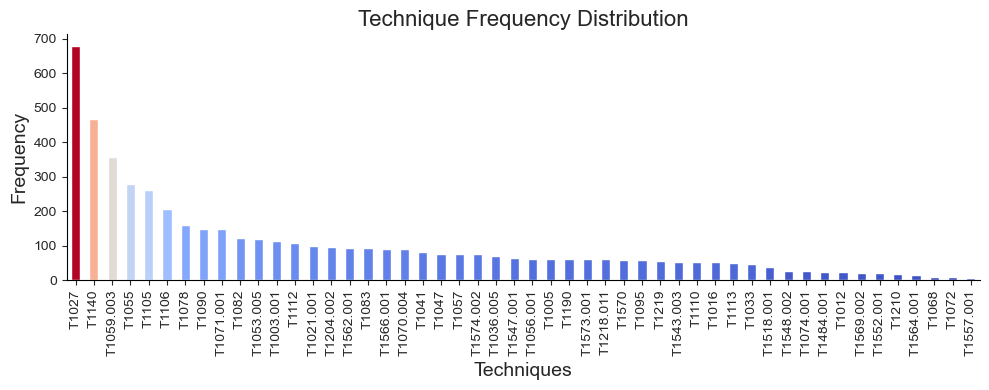

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

vc = data['labels'].explode().value_counts()


plt.figure(figsize=(10, 4))
vc.plot(kind='bar')

# Create a color map
cmap = plt.get_cmap('coolwarm')

# Normalize the counts to range between 0 and 1 to fit into the color map
norm = mcolors.Normalize(vmin=vc.min(), vmax=vc.max())

# Plot the data with color gradient
vc.plot(kind='bar', color=cmap(norm(vc.values)))

plt.title('Technique Frequency Distribution', fontsize=16)
plt.xlabel('Techniques', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
ax = plt.gca()
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_facecolor('none')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.draw()
plt.savefig('multi_technique.pdf', format='pdf')
plt.show()

In [8]:
doc_titles = data['doc_title'].explode().dropna().unique()
doc_titles

array(['NotPetya Technical Analysis  A Triple Threat File Encryption MFT Encryption Credential Theft',
       'Earth Zhulong Familiar Patterns Target Southeast Asian Firms',
       'Malware Spotlight Camaro Dragons TinyNote Backdoor',
       'Rorschach  A New Sophisticated and Fast Ransomware  Check Point Research',
       'Bypassing Intel CET with Counterfeit Objects  OffSec',
       'Emotet Strikes Again  LNK File Leads to Domain Wide Ransomware  The DFIR Report',
       'Malware Analysis LummaC2 Stealer',
       'FedEx Phishing Campaign Abusing TrustedForm and PAAY',
       'Take a NetWalk on the Wild Side',
       'Malicious OAuth applications used to compromise email servers and spread spam  Microsoft Security Blog',
       'Nefilim Ransomware',
       'Deja Vu All Over Again Tax Scammers at Large',
       'Threat Assessment Black Basta Ransomware',
       'Hafniuminspired cyberattacks neutralized by AI',
       'eSentire Threat Intelligence Malware Analysis BatLoader',
       'Ea

In [10]:
doc_titles.shape

(151,)

/var/folders/c4/syfmh0gs1jbb5q_69pf2hs4c0000gn/T/ipykernel_26963/3148180015.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontsize = 12, rotation=45)


<Figure size 640x480 with 0 Axes>

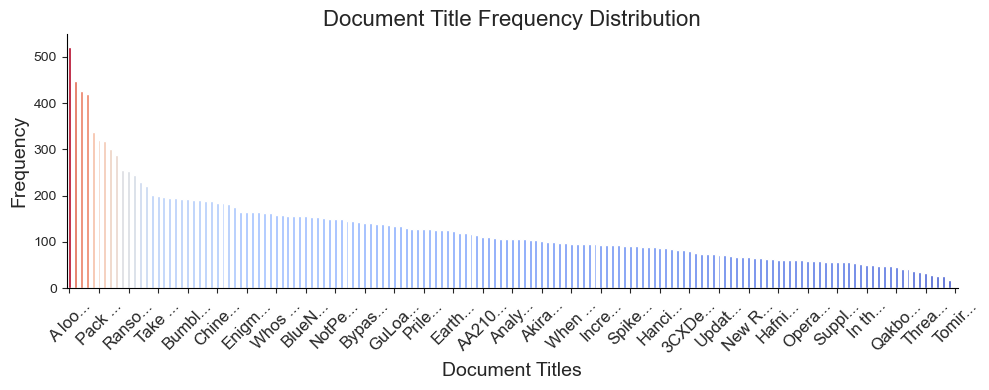

In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dc = data['doc_title'].value_counts()
new_labels = [label[:5] for label in dc.index]

plt.clf()
plt.figure(figsize=(10, 4))

cmap = plt.get_cmap('coolwarm')

# Normalize the counts to range between 0 and 1 to fit into the color map
norm = mcolors.Normalize(vmin=dc.min(), vmax=dc.max())

# Plot the data with color gradient
dc.plot(kind='bar', color=cmap(norm(dc.values)))

plt.title('Document Title Frequency Distribution', fontsize=16)
plt.xlabel('Document Titles', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set xticks to display every 10th label
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

# New code
labels = ax.get_xticklabels()
new_labels = [f'{label.get_text()[:5]}...' for label in labels]  # Change 10 to any number you want
ax.set_xticklabels(new_labels, fontsize = 12, rotation=45)
plt.tight_layout()

# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_facecolor('none')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.draw()
plt.savefig('multi_title.pdf', format='pdf')
plt.show()

In [10]:
sentence = data['sentence'].to_numpy()

In [11]:
sentence.shape

(19178,)

In [12]:
sentence

array(['title: NotPetya Technical Analysis – A Triple Threat: File Encryption, MFT Encryption, Credential Theft url: https://www.crowdstrike.com/blog/petrwrap-ransomware-technical-analysis-triple-threat-file-encryption-mft-encryption-credential-theft/ Update: Due to naming convention consistency in the industry, CrowdStrike is now calling this variant of Petya – NotPetya. ',
       'Executive Summary This technical analysis provides an in-depth analysis and review of NotPetya. ',
       'For more information on CrowdStrike’s proactive protection features see the earlier CrowdStrike blog on how Falcon Endpoint Protection prevents the NotPetya attack. ',
       ...,
       'Added MITRE ATT&CK Technique T1592.003 used for reconnaissance May 20, 2021:',
       'Added new MITRE ATT&CKs and updated Table 1 ',
       'This product is provided subject to this Notification and this Privacy & Use policy. '],
      dtype=object)

Adding them all in one place labels, text, doc_titles: there are 50 labels, 151 doc_titles and 19178 sentences

In [13]:
nodes = np.concatenate((all_techniques, doc_titles, sentence))
nodes

array(['T1210', 'T1570', 'T1140', ...,
       'Added MITRE ATT&CK Technique T1592.003 used for reconnaissance May 20, 2021:',
       'Added new MITRE ATT&CKs and updated Table 1 ',
       'This product is provided subject to this Notification and this Privacy & Use policy. '],
      dtype=object)

In [14]:
nodes.shape

(19379,)

In [15]:
assert len(nodes) == len(all_techniques) + len(doc_titles) + len(sentence)

The node list will then have 
    0-49 techniques
    50-200 doc_titles 
    201-19378 text
    
Now to make the numeric triples, we will use the indexes of the nodes from the nodes list.


Let us say that of the two relationships, uses = 0 and used-in = 1, found-in = 2

1. we make the triples for sentence uses technique
2. we make the triples for sentence found-in doc_title
3. we make the triples for technique used-in doc_title

In [18]:
triples = []
tech2doc = []

np_data = data.to_numpy()
s2d = 0
s2t = 0
for row in np_data:
    sentence_index = np.where(nodes == row[0])[0][0]
    technique_indices = []
    technique_indices.extend([np.where(nodes == technique)[0][0] for technique in row[1]])
    doc_title_index = np.where(nodes == row[2])[0][0]
    
    triples.append((sentence_index, 2, doc_title_index))
    s2d += 1
    if technique_indices:
        triples.extend([(sentence_index, 0, technique_index) for technique_index in technique_indices])
        s2t += len(technique_indices)
    tech2doc.extend([(technique_index, 1, doc_title_index) for technique_index in technique_indices])

print(f'Number of sentence2doc: {s2d}')
print(f'Number of sentence2tech: {s2t}')

Number of sentence2doc: 19178
Number of sentence2tech: 5143


In [19]:
# print(triples)
# print(tech2doc)
len(triples)

24321

In [20]:
tech2doc = np.unique(tech2doc, axis=0)
print(f'Number of tech2doc: {len(tech2doc)}')
triples = np.array(triples)
triples = np.append(triples, tech2doc, axis=0)

Number of tech2doc: 1653


split the triples into train, validation, test and save them to a file

In [21]:
print(f'Number of Techniques: {len(all_techniques)}')
print(f'Number of Doc Titles: {len(doc_titles)}')
print(f'Number of Texts: {len(sentence)}')
print(f'Number of Nodes: {len(nodes)}')
print(f'Number of Triples: {len(triples)}')

Number of Techniques: 50
Number of Doc Titles: 151
Number of Texts: 19178
Number of Nodes: 19379
Number of Triples: 25974


In [31]:
%%bash

mkdir -p ../data/output/multi

In [32]:
output = "../data/output/multi"
pd.DataFrame(triples).to_csv(output + '/triples.txt', index=False, header=False, sep=' ')
train, valid = train_test_split(triples, test_size=0.05)
pd.DataFrame(train).to_csv(output + '/train.txt', index=False, header=False, sep=' ')
pd.DataFrame(valid).to_csv(output + '/valid.txt', index=False, header=False, sep=' ')
assert len(train) + len(valid) == len(triples)

Also train test validation split the nodes.txt for MLM 

In [33]:
def write_file(file_path, _list):
    with open(file_path, 'w') as f:
        for _row in _list:
            f.write(_row.replace("\n", r"\n").replace("\t", r"\t") + "\n")

In [34]:
n_train, n_test = train_test_split(nodes, test_size=0.2)

n_train, n_valid = train_test_split(n_train, test_size=0.05)

assert len(n_train) + len(n_test) + len(n_valid) == len(nodes)

write_file(output + '/nodes_train.txt', n_train)
write_file(output + '/nodes_valid.txt', n_valid)
write_file(output + '/nodes_test.txt', n_test)

save the nodes to a file, this is somewhat tricky, since some of the node texts contain newline characters, and we need to preserve them.

In [35]:
write_file(output + '/nodes.txt', nodes)

Now we follow Kepler@s Readme.md and prepare the KE and MLM data from the above files.

    We will use the nodes...txt as our MLM data.
    We will use the triples...txt as our KE data.
    

We first install the local version of kepler, which is built by extending fairsec:
We now start with KE data preprocessing:

In [37]:
%%bash
cd ../..
python -m pip install --editable .

Obtaining file:///home/sougata/projects/MyKEPLER
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: fairseq
    Found existing installation: fairseq 0.8.0
    Uninstalling fairseq-0.8.0:
      Successfully uninstalled fairseq-0.8.0
  Running setup.py develop for fairseq


1. Encode the entity descriptions with the GPT-2 BPE:

In [38]:
%%bash

# mkdir -p ../data/gpt2_bpe
# wget -O ../data/gpt2_bpe/encoder.json https://dl.fbaipublicfiles.com/fairseq/gpt2_bpe/encoder.json
# wget -O ../data/gpt2_bpe/vocab.bpe https://dl.fbaipublicfiles.com/fairseq/gpt2_bpe/vocab.bpe

export LD_LIBRARY_PATH=/home/sougata/.local/lib/python3.10/site-packages/nvidia/nvjitlink/lib:$LD_LIBRARY_PATH

python ../../examples/roberta/multiprocessing_bpe_encoder.py \
    --encoder-json ../data/gpt2_bpe/encoder.json \
    --vocab-bpe ../data/gpt2_bpe/vocab.bpe \
    --inputs ../data/output/multi/nodes.txt \
    --outputs ../data/output/multi/nodes.bpe \
    --keep-empty \
    --workers 60

processed 10000 lines


2. Do negative sampling and dump the whole training and validation data:

In [39]:
%%bash

python ../../examples/KEPLER/Pretrain/KGpreprocess.py --dumpPath ../data/output/multi/KE1 \
    -ns 1 \
    --ent_desc ../data/output/multi/nodes.bpe \
    --train ../data/output/multi/train.txt \
    --valid ../data/output/multi/valid.txt

2024-04-21 22:05:38.268515 load finish
2024-04-21 22:05:38.353494 preparation finished
2024-04-21 22:05:40.921061 training set finished
2024-04-21 22:05:41.068764 all finished


3. then randomly split the KE training data into smaller parts and the number of training instances in each part aligns with the MLM training data
For our case it will be just one split, since our data is small.

Question: what does the negative_sampling_size = 1 do? it could be that the relation triples are false.
Ans: it has 1 to 1 size of negative sampling, so for each positive triple, there is one negative triple.

In [40]:
%%bash

export LD_LIBRARY_PATH=/home/sougata/.local/lib/python3.10/site-packages/nvidia/nvjitlink/lib:$LD_LIBRARY_PATH

python ../../examples/KEPLER/Pretrain/splitDump.py --Path ../data/output/multi/KE1 \
    --split_size 6834352 \
    --negative_sampling_size 1

The data will be splited into 1 splits


In [41]:
%%bash

# wget -O ../data/gpt2_bpe/dict.txt https://dl.fbaipublicfiles.com/fairseq/gpt2_bpe/dict.txt

export LD_LIBRARY_PATH=/home/sougata/.local/lib/python3.10/site-packages/nvidia/nvjitlink/lib:$LD_LIBRARY_PATH

KE_Data=../data/output/multi/KE1_0/
for SPLIT in head tail negHead negTail;
  do
    python -m fairseq_cli.preprocess \
      --only-source \
      --srcdict ../data/gpt2_bpe/dict.txt \
      --trainpref ${KE_Data}${SPLIT}/train.bpe \
      --validpref ${KE_Data}${SPLIT}/valid.bpe \
      --destdir ${KE_Data}${SPLIT} \
      --workers 60; \
  done

Namespace(no_progress_bar=False, log_interval=1000, log_format=None, tensorboard_logdir='', tbmf_wrapper=False, seed=1, cpu=False, fp16=False, memory_efficient_fp16=False, fp16_init_scale=128, fp16_scale_window=None, fp16_scale_tolerance=0.0, min_loss_scale=0.0001, threshold_loss_scale=None, user_dir=None, criterion='cross_entropy', tokenizer=None, bpe=None, optimizer='nag', lr_scheduler='fixed', task='translation', source_lang=None, target_lang=None, trainpref='../data/output/multi/KE1_0/head/train.bpe', validpref='../data/output/multi/KE1_0/head/valid.bpe', testpref=None, destdir='../data/output/multi/KE1_0/head', thresholdtgt=0, thresholdsrc=0, tgtdict=None, srcdict='../data/gpt2_bpe/dict.txt', nwordstgt=-1, nwordssrc=-1, alignfile=None, dataset_impl='mmap', joined_dictionary=False, only_source=True, padding_factor=8, workers=60, bert=False)
| [None] Dictionary: 50263 types
| [None] ../data/output/multi/KE1_0/head/train.bpe: 24675 sents, 953992 tokens, 0.0% replaced by <unk>
| [None

4. We then binarize them for training:

In [42]:
%%bash

# wget -O ../data/gpt2_bpe/dict.txt https://dl.fbaipublicfiles.com/fairseq/gpt2_bpe/dict.txt

export LD_LIBRARY_PATH=/home/sougata/.local/lib/python3.10/site-packages/nvidia/nvjitlink/lib:$LD_LIBRARY_PATH

KE_Data=../data/output/multi/KE1_0/
for SPLIT in head tail negHead negTail;
  do
    python -m fairseq_cli.preprocess \
      --only-source \
      --srcdict ../data/gpt2_bpe/dict.txt \
      --trainpref ${KE_Data}${SPLIT}/train.bpe \
      --validpref ${KE_Data}${SPLIT}/valid.bpe \
      --destdir ${KE_Data}${SPLIT} \
      --workers 60; \
  done

Namespace(no_progress_bar=False, log_interval=1000, log_format=None, tensorboard_logdir='', tbmf_wrapper=False, seed=1, cpu=False, fp16=False, memory_efficient_fp16=False, fp16_init_scale=128, fp16_scale_window=None, fp16_scale_tolerance=0.0, min_loss_scale=0.0001, threshold_loss_scale=None, user_dir=None, criterion='cross_entropy', tokenizer=None, bpe=None, optimizer='nag', lr_scheduler='fixed', task='translation', source_lang=None, target_lang=None, trainpref='../data/output/multi/KE1_0/head/train.bpe', validpref='../data/output/multi/KE1_0/head/valid.bpe', testpref=None, destdir='../data/output/multi/KE1_0/head', thresholdtgt=0, thresholdsrc=0, tgtdict=None, srcdict='../data/gpt2_bpe/dict.txt', nwordstgt=-1, nwordssrc=-1, alignfile=None, dataset_impl='mmap', joined_dictionary=False, only_source=True, padding_factor=8, workers=60, bert=False)
| [None] Dictionary: 50263 types
| [None] ../data/output/multi/KE1_0/head/train.bpe: 24675 sents, 953992 tokens, 0.0% replaced by <unk>
| [None

We now start with MLM data preprocessing:


1. Now we encode the nodes_train, nodes_train and nodes_valid with the GPT-2 BPE:
   (gpt2_bpe is already downloaded during the KE data preparation, we reuse that.)

In [43]:
%%bash

export LD_LIBRARY_PATH=/home/sougata/.local/lib/python3.10/site-packages/nvidia/nvjitlink/lib:$LD_LIBRARY_PATH

mkdir -p ../data/output/multi/MLM

for SPLIT in train valid test; do \
    python -m examples.roberta.multiprocessing_bpe_encoder \
        --encoder-json ../data/gpt2_bpe/encoder.json \
        --vocab-bpe ../data/gpt2_bpe/vocab.bpe \
        --inputs ../data/output/multi/nodes_${SPLIT}.txt \
        --outputs ../data/output/multi/MLM/nodes_${SPLIT}.bpe \
        --keep-empty \
        --workers 60; \
done

processed 10000 lines


2. We then preprocess/binarize the data using the GPT-2 fairseq dictionary:

In [44]:
%%bash

export LD_LIBRARY_PATH=/home/sougata/.local/lib/python3.10/site-packages/nvidia/nvjitlink/lib:$LD_LIBRARY_PATH

mkdir -p ../data/output/multi/MLM-bin

python -m fairseq_cli.preprocess \
    --only-source \
    --srcdict ../data/gpt2_bpe/dict.txt \
    --trainpref ../data/output/multi/MLM/nodes_train.bpe \
    --validpref ../data/output/multi/MLM/nodes_valid.bpe \
    --testpref ../data/output/multi/MLM/nodes_test.bpe \
    --destdir ../data/output/multi/MLM-bin \
    --workers 60

Namespace(no_progress_bar=False, log_interval=1000, log_format=None, tensorboard_logdir='', tbmf_wrapper=False, seed=1, cpu=False, fp16=False, memory_efficient_fp16=False, fp16_init_scale=128, fp16_scale_window=None, fp16_scale_tolerance=0.0, min_loss_scale=0.0001, threshold_loss_scale=None, user_dir=None, criterion='cross_entropy', tokenizer=None, bpe=None, optimizer='nag', lr_scheduler='fixed', task='translation', source_lang=None, target_lang=None, trainpref='../data/output/multi/MLM/nodes_train.bpe', validpref='../data/output/multi/MLM/nodes_valid.bpe', testpref='../data/output/multi/MLM/nodes_test.bpe', destdir='../data/output/multi/MLM-bin', thresholdtgt=0, thresholdsrc=0, tgtdict=None, srcdict='../data/gpt2_bpe/dict.txt', nwordstgt=-1, nwordssrc=-1, alignfile=None, dataset_impl='mmap', joined_dictionary=False, only_source=True, padding_factor=8, workers=60, bert=False)
| [None] Dictionary: 50263 types
| [None] ../data/output/multi/MLM/nodes_train.bpe: 14727 sents, 589525 tokens,

All preprocessing is done, now we try out training the model with our data.

Then we first train on the NLP model, since the kepler NLP pretrained model checkpoint is already present.

In [ ]:
%%bash

export LD_LIBRARY_PATH=/home/sougata/.local/lib/python3.10/site-packages/nvidia/nvjitlink/lib:$LD_LIBRARY_PATH

mkdir ../data/checkpoints/multi/

TOTAL_UPDATES=125000                                    # Total number of training steps
WARMUP_UPDATES=10000                                    # Warmup the learning rate over this many updates
LR=6e-04                                                # Peak LR for polynomial LR scheduler.
NUM_CLASSES=2                           
MAX_SENTENCES=3                                         # Batch size.
NUM_NODES=1			                                    # Number of machines
ROBERTA_PATH=../data/keplerModels/KEPLERforNLP.pt       # Path to the original roberta model
CHECKPOINT_PATH=../data/checkpoints/multi               # Directory to store the checkpoints
UPDATE_FREQ=`expr 784 / $NUM_NODES`                     # Increase the batch size

DATA_DIR=../data/output/multi

#Path to the preprocessed KE dataset, each item corresponds to a data directory for one epoch
KE_DATA=$DATA_DIR/KE1_0:

DIST_SIZE=`expr $NUM_NODES`

python -m fairseq_cli.train $DATA_DIR/MLM-bin --KEdata $KE_DATA --restore-file $ROBERTA_PATH \
        --save-dir $CHECKPOINT_PATH \
        --max-sentences $MAX_SENTENCES \
        --tokens-per-sample 512 \
        --task MLMetKE \
        --sample-break-mode complete \
        --required-batch-size-multiple 1 \
        --arch roberta_base \
        --criterion MLMetKE \
        --dropout 0.1 --attention-dropout 0.1 --weight-decay 0.01 \
        --optimizer adam --adam-betas "(0.9, 0.98)" --adam-eps 1e-06 \
        --clip-norm 0.0 \
        --lr-scheduler polynomial_decay --lr $LR --total-num-update $TOTAL_UPDATES --warmup-updates $WARMUP_UPDATES \
        --update-freq "$UPDATE_FREQ" \
        --negative-sample-size 1 --ke-model TransE \
        --init-token 0 \
        --separator-token 2 \
        --gamma 4 --nrelation 822 \
        --skip-invalid-size-inputs-valid-test \
        --fp16 --fp16-init-scale 2 --threshold-loss-scale 1 --fp16-scale-window 128 \
        --reset-optimizer --distributed-world-size "${DIST_SIZE}" --ddp-backend no_c10d --distributed-port 23456 \
        --log-format simple --log-interval 1 > out_multi.log \
        #--relation-desc  #Add this option to encode the relation descriptions as relation embeddings (KEPLER-Rel in the paper)

/home/sougata/projects/MyKEPLER/fairseq/optim/adam.py:142: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1630.)
  exp_avg.mul_(beta1).add_(1 - beta1, grad)


Evaluate model

In [ ]:
%%bash

python -m fairseq-eval-lm ../data/output/multi/MLM-bin \
    --path ../data/checkpoints/multi/checkpoint_best.pt \
    --sample-break-mode complete --max-tokens 3072 \
    --context-window 2560 --softmax-batch 1024